<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/Titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pson2900","key":"14bc23a726a8c51129e734a2f9de0dde"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Jan  2 10:02 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
spscientist/students-performance-in-exams                     Students Performance in Exams                         8KB  2018-11-09 18:25:25           9550  
mehdidag/black-friday                                         Black Friday                                          5MB  2018-07-25 20:49:48          23992  
lava18/google-play-store-apps                                 Google Play Store Apps                                2MB  2018-09-18 20:49:49          29029  
szamil/who-suicide-statistics                                 WHO Suicide Statistics                              307KB  2018-08-29 21:23:11           6434  
iarunava/happy-house-dataset                        

In [6]:
# Copy the stackoverflow data set locally.
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 18.2MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.3MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.29MB/s]


In [7]:
!sudo pip install -U seaborn

    100% |████████████████████████████████| 215kB 30.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [8]:
training.head()

NameError: ignored

In [67]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender =  pd.read_csv('gender_submission.csv')

X = training.drop('Survived',axis = 1 )
y = training.Survived
#drop name + pass id
feature_train = X.drop(['Name','PassengerId'],axis = 1)
feature_test = test.drop(['Name','PassengerId'],axis = 1)
# chuan hoa SEX
gioitinh= {'male':0,'female':1}
feature_train.Sex.replace(gioitinh,inplace = True)
feature_test.Sex.replace(gioitinh,inplace = True)
# chuan hoa embarked
embarked = {'S':1,'C':2,'Q':3}
feature_train.Embarked.replace(embarked,inplace = True)
feature_train.Embarked.fillna(0,inplace = True)

feature_test.Embarked.replace(embarked,inplace = True)
feature_test.Embarked.fillna(0,inplace = True)
# chuan hoa family =  Sibsp + parch
feature_train['Family'] = feature_train.SibSp  + feature_train.Parch
feature_train.Family.loc[feature_train.Family > 0] =1 
feature_train.Family.loc[feature_train.Family == 0] = 0 

feature_test['Family'] = feature_train.SibSp  + feature_train.Parch
feature_test.Family.loc[feature_train.Family > 0] =1 
feature_test.Family.loc[feature_train.Family == 0] = 0 
#chuan hoa AGE
feature_train.Age.fillna(0,inplace = True)
feature_test.Age.fillna(0,inplace = True)

feature_train.Cabin.fillna("X",inplace = True)
feature_train.Cabin = [i[0] for i in feature_train.Cabin]
s = feature_train.Cabin.sort_values().unique()
label = pd.factorize(s)
feature_train.Cabin = feature_train.Cabin.replace(label[1],label[0])

X = feature_train.drop(['Ticket','SibSp','Parch'],axis= 1)

print(feature_train.shape, feature_test.shape)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(891, 10) (418, 10)


In [0]:
combine = [feature_train,feature_test]

In [65]:
feature_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,3,0,22.0,1,0,A/5 21171,7.2500,8,1.0,1
1,1,1,38.0,1,0,PC 17599,71.2833,2,2.0,1
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,8,1.0,0
3,1,1,35.0,1,0,113803,53.1000,2,1.0,1
4,3,0,35.0,0,0,373450,8.0500,8,1.0,0


In [35]:
training[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived',ascending= True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [36]:
training[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived',ascending= True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [37]:
training[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived',ascending= True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [38]:
training[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived',ascending= True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


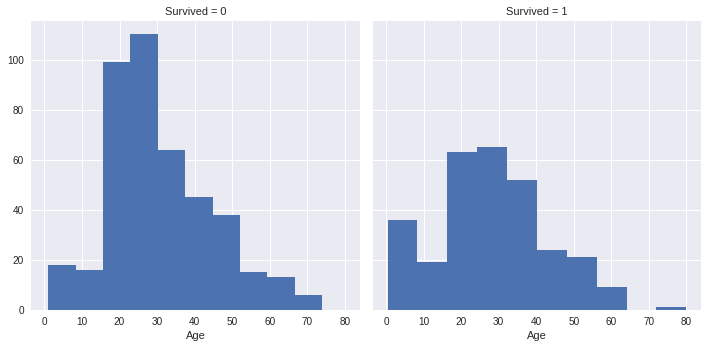

In [39]:
sns.FacetGrid(data= training, col = 'Survived',size = 5).map(plt.hist,'Age',bins = 10,)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  confint = []


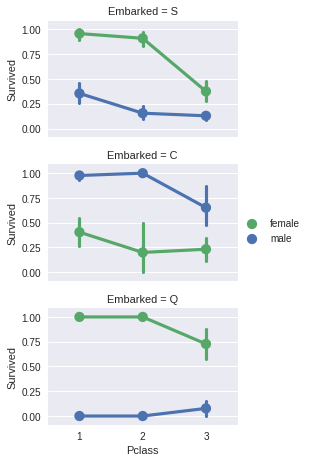

In [40]:
grid = sns.FacetGrid(training, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


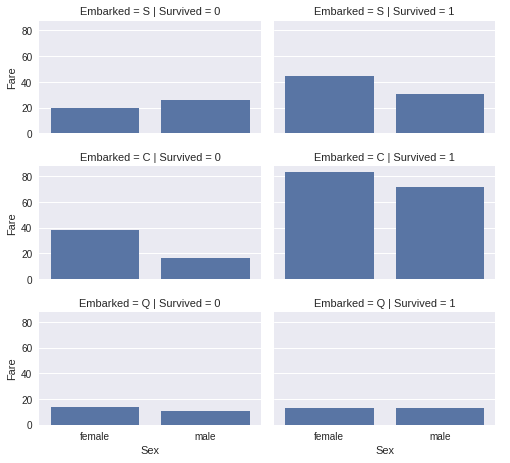

In [41]:
grid = sns.FacetGrid(training, row='Embarked',col = 'Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare',ci = None)
grid.add_legend()

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
# edit dataset
guess_ages = np.zeros((2,3))
for dataset in combine:
  for i in range(0,2):
    for j in range(0,3):
        guess_df = dataset[(dataset['Sex'] == i) &(dataset['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
  for i in range(0,2):
    for j in range(0,3):
      dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

pandas.core.frame.DataFrame

ValueError: ignored

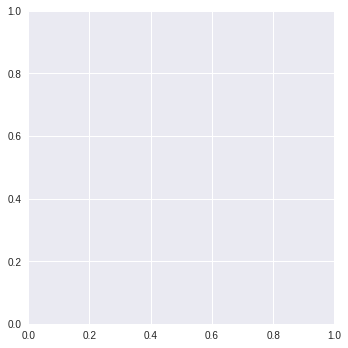

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(X, hue = 'Survived', size = 5).map(plt.hist,'Fare','Age').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


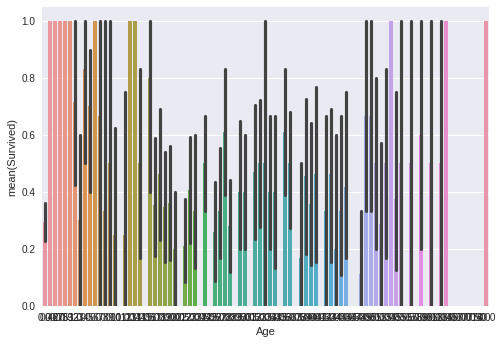

In [0]:
sns.barplot("Age","Survived", data = X)

In [0]:
test.head()
X_test = test
feature_test = X_test.drop(['Name','PassengerId'],axis = 1)

gioitinh= {'male':0,'female':1}
feature_test.Sex.replace(gioitinh,inplace = True)

embarked = {'S':0,'C':1,'Q':2}
feature_test.Embarked.replace(embarked,inplace= True)


feature_test['Family'] = feature_test.SibSp  + feature_train.Parch
feature_test.Family.loc[feature_test.Family > 0] =1 
feature_test.Family.loc[feature_test.Family == 0] = 0 

feature_test.Age.fillna(0,inplace = True)

feature_test.Cabin.fillna('X',inplace = True)
feature_test.Cabin = [i[0] for i in feature_test.Cabin]
h = feature_test.Cabin.sort_values().unique()
label = pd.factorize(h)
feature_test.Cabin = feature_test.Cabin.replace(label[1],label[0])

feature_test.Fare.fillna(0,inplace = True)
feature_test = feature_test.drop(['SibSp','Parch','Ticket'],axis = 1 )
X_test = feature_test
y_test = gender.Survived

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_validate
print(X_train.shape)
print(y_train.shape)

model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
loss = mean_squared_error(y_test,pred)
print('Mean Squared Error: ', loss)
score = r2_score(y_test,pred)
print('Variabel accuracy: %.2f',score)
# vals = cross_validate(model,X_val,y_val,)
# print('val_score', vals)

(668, 7)
(668,)
Mean Squared Error:  0.06892984070391245
Variabel accuracy: %.2f 0.7021246169580926


In [0]:
a = y_train.reshape(-1,1)
a.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(668, 1)